In [1]:
%matplotlib widget
import spectral as spy
import spectral.io.envi as envi

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import japanize_matplotlib

from PIL import Image
import csv
import mplcursors

from scipy.signal import argrelmax
import seaborn as sns

In [2]:
HDR_PATH_iphone = '/data/iphone_green_200_compare_2023-08-07_011/results/REFLECTANCE_2023-08-07_011.hdr'
HDR_PATH_pixel = '/data/pixel_green_200_compare2023-08-07_012/results/REFLECTANCE_2023-08-07_012.hdr'
HDR_PATH_huawei = '/data/huawei_green_200_compare_2023-08-07_014/results/REFLECTANCE_2023-08-07_014.hdr'

IMG_PATH_iphone = '/data/iphone_green_200_compare_2023-08-07_011/results/REFLECTANCE_2023-08-07_011.png'
IMG_PATH_pixel = '/data/pixel_green_200_compare2023-08-07_012/results/REFLECTANCE_2023-08-07_012.png'
IMG_PATH_huawei = '/data/huawei_green_200_compare_2023-08-07_014/results/REFLECTANCE_2023-08-07_014.png'

In [3]:
spec_img_i = envi.open(HDR_PATH_iphone)
spec_img_p = envi.open(HDR_PATH_pixel)
spec_img_h = envi.open(HDR_PATH_huawei)

In [4]:
wave_lengthes = []
hdr = envi.read_envi_header(HDR_PATH_iphone)

for wl in hdr['wavelength']:
    wave_lengthes.append(float(wl))

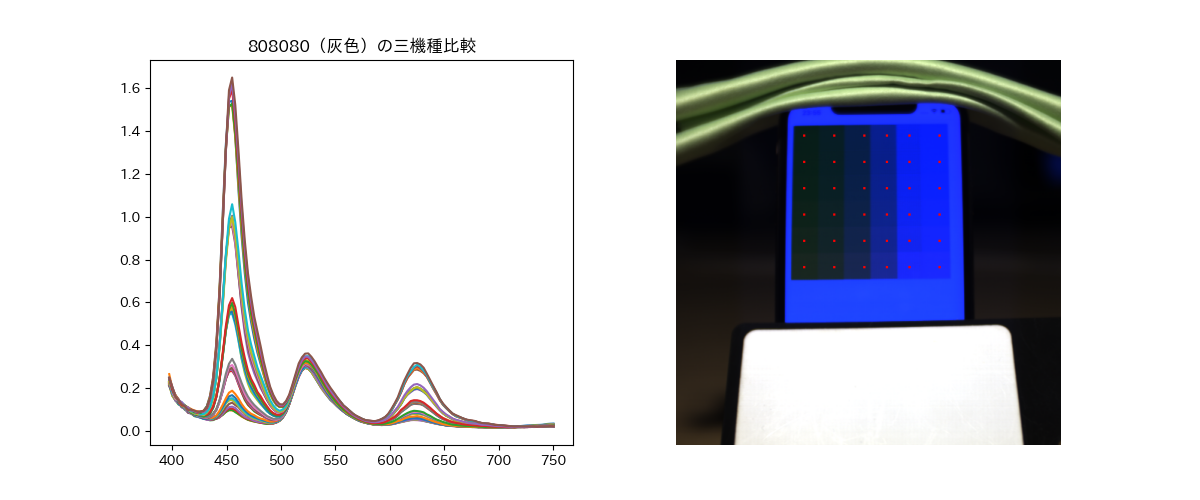

In [5]:
pixel_x = 350 # X座標
pixel_y = 240  # Y座標
color = (255, 0, 0)  # 色(RGB値)

coors = [(170,100),(210,100),(250,100),(280,100),(310,100),(350,100)]

dots=[-1,0,1]
image_i = Image.open(IMG_PATH_iphone)
for coor in coors:
    for t in range(6):
        for i in dots:
            for j in dots:
                image_i.putpixel((coor[0]+i, coor[1]+35*t+j), color)
        
x = wave_lengthes[:121]
ys = []
for coor in coors:
    for t in range(6):
        ys.append(spec_img_i.read_pixel(512-coor[0],coor[1]+35*t)[:121])

fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)



for y in ys:
    ax1.plot(x,y)
ax1.set_title('808080（灰色）の三機種比較')
ax2.imshow(image_i)
ax2.axis('off')
mplcursors.cursor(hover=True)

plt.show()

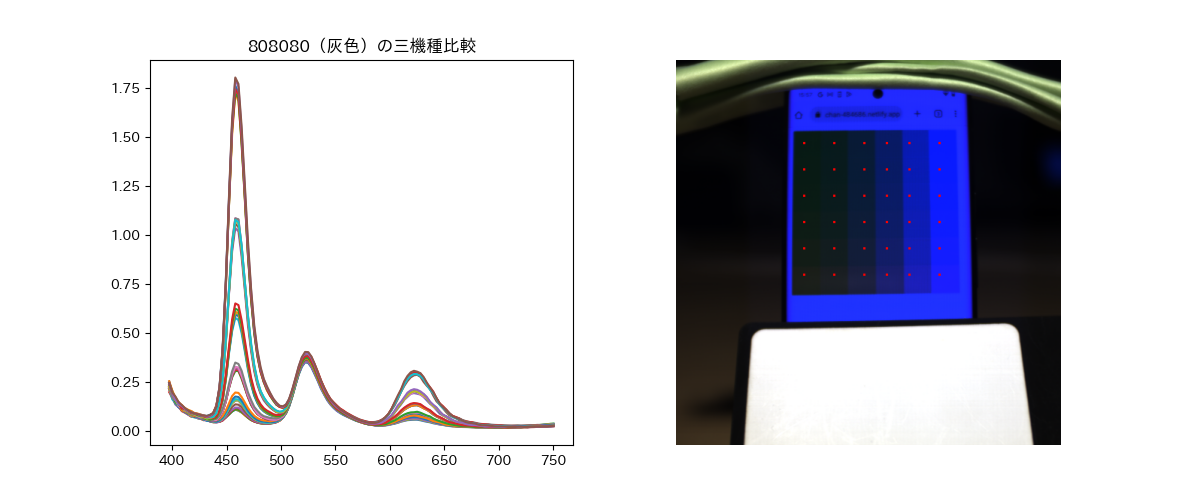

In [6]:
pixel_x = 350 # X座標
pixel_y = 240  # Y座標
color = (255, 0, 0)  # 色(RGB値)

coors = [(170,110),(210,110),(250,110),(280,110),(310,110),(350,110)]

dots=[-1,0,1]
image_p = Image.open(IMG_PATH_pixel)
for coor in coors:
    for t in range(6):
        for i in dots:
            for j in dots:
                image_p.putpixel((coor[0]+i, coor[1]+35*t+j), color)
        
x = wave_lengthes[:121]
ys_p = []
for coor in coors:
    for t in range(6):
        ys_p.append(spec_img_p.read_pixel(512-coor[0],coor[1]+35*t)[:121])

fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)



for y in ys_p:
    ax1.plot(x,y)
ax1.set_title('808080（灰色）の三機種比較')
ax2.imshow(image_p)
ax2.axis('off')
mplcursors.cursor(hover=True)

plt.show()

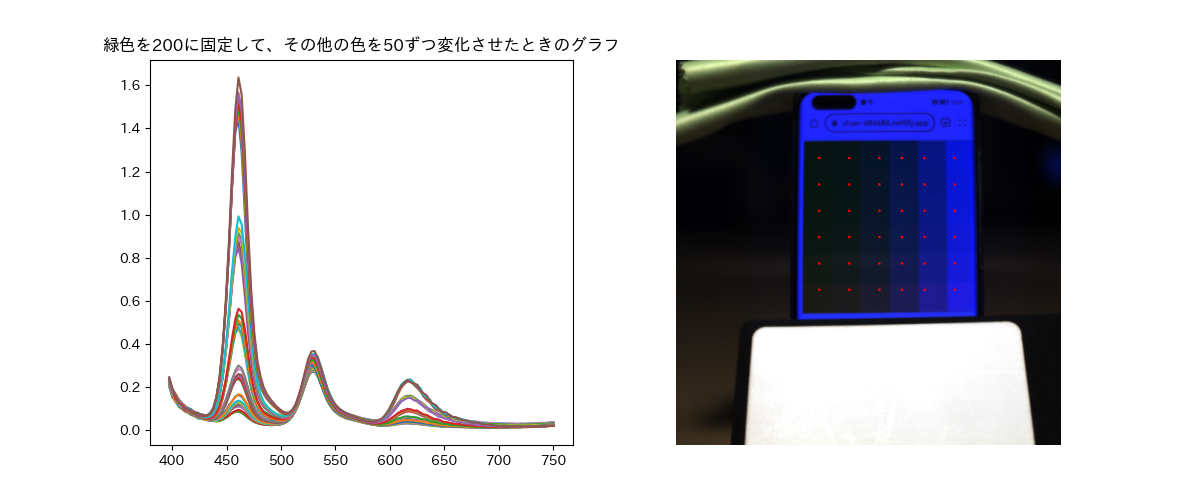

In [7]:
pixel_x = 350 # X座標
pixel_y = 240  # Y座標
color = (255, 0, 0)  # 色(RGB値)

coors = [(190,130),(230,130),(270,130),(300,130),(330,130),(370,130)]

dots=[-1,0,1]
image_h = Image.open(IMG_PATH_huawei)
for coor in coors:
    for t in range(6):
        for i in dots:
            for j in dots:
                image_h.putpixel((coor[0]+i, coor[1]+35*t+j), color)
        
x = wave_lengthes[:121]
ys_h = []
for coor in coors:
    for t in range(6):
        ys_h.append(spec_img_h.read_pixel(512-coor[0],coor[1]+35*t)[:121])

fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)



for y in ys_h:
    ax1.plot(x,y)
ax1.set_title('緑色を200に固定して、その他の色を50ずつ変化させたときのグラフ')
ax2.imshow(image_h)
ax2.axis('off')
mplcursors.cursor(hover=True)

plt.show()

0.34920636
0.35798547
0.36825818
0.37781706
0.37142858
0.3829401
0.3600907
0.35117966
0.35918367
0.3756076
0.38356164
0.3938992
0.3569161
0.3629764
0.3723356
0.37159708
0.37207246
0.38638374
0.3637188
0.3576481
0.36030063
0.37250453
0.3814059
0.39699382
0.353288
0.36116153
0.37414965
0.38532922
0.37251437
0.38328913
0.37460318
0.37068966
0.3723356
0.3813522
0.39501134
0.40199637
0.3725481 0.013105112


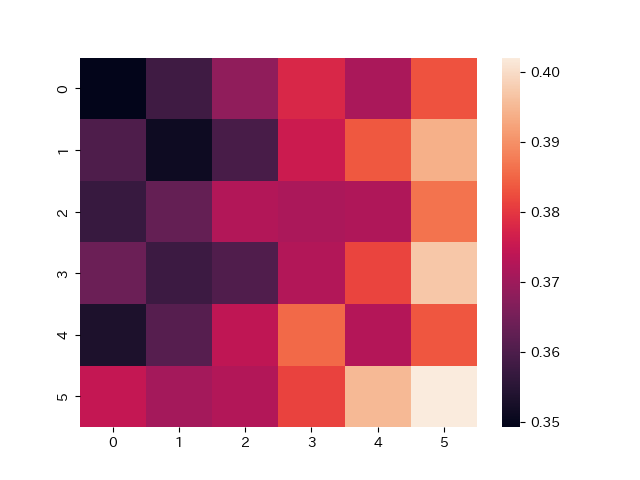

In [8]:
green_p = []
for y in ys_p:
    ex_max_p=argrelmax(y,order=3)
    print(y[ex_max_p[0][1]])
    green_p.append(y[ex_max_p[0][1]])

plt.figure()
sns.heatmap(np.array(green_p).reshape(-1, 6))
print(np.mean(green_p),np.std(green_p))

In [9]:
green_i = []
for y in ys:
    ex_max_i=argrelmax(y,order=3)
    # print(y[ex_max_i[0][1]])
    green_i.append(y[ex_max_i[0][1]])
print(np.mean(green_i),np.std(green_i))

0.31729633 0.018966215


0.27268836
0.28112966
0.28540865
0.2928082
0.31364998
0.3270548
0.27696916
0.28455284
0.29311082
0.30222604
0.32734275
0.33690068
0.2841506
0.29097134
0.2969619
0.31421232
0.33204964
0.3416096
0.28633976
0.29610613
0.3020967
0.317637
0.33590072
0.34931508
0.29859895
0.30516636
0.31236628
0.3270548
0.3448866
0.3561644
0.30998248
0.31873906
0.32924694
0.33887917
0.3485114
0.36815068
0.31385946 0.024573933


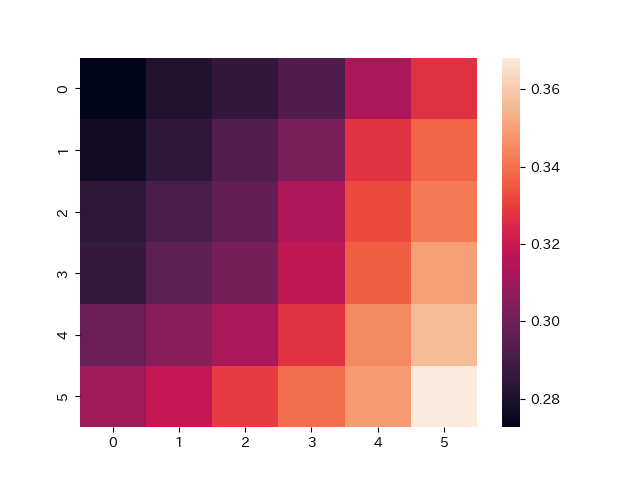

In [10]:
green_h = []
for y in ys_h:
    ex_max_h=argrelmax(y,order=3)
    print(y[ex_max_h[0][1]])
    green_h.append(y[ex_max_h[0][1]])

plt.figure()
sns.heatmap(np.array(green_h).reshape(-1, 6))
print(np.mean(green_h),np.std(green_h))

In [11]:
green_h = []
for y in ys_h:
    green_h.append(y[43])
print(np.mean(green_h),np.std(green_h))

0.23338199 0.017505012


[[0.34920636 0.35798547 0.36825818 0.37781706 0.37142858 0.3829401 ]
 [0.3600907  0.35117966 0.35918367 0.3756076  0.38356164 0.3938992 ]
 [0.3569161  0.3629764  0.3723356  0.37159708 0.37207246 0.38638374]
 [0.3637188  0.3576481  0.36030063 0.37250453 0.3814059  0.39699382]
 [0.353288   0.36116153 0.37414965 0.38532922 0.37251437 0.38328913]
 [0.37460318 0.37068966 0.3723356  0.3813522  0.39501134 0.40199637]]


<Axes: >

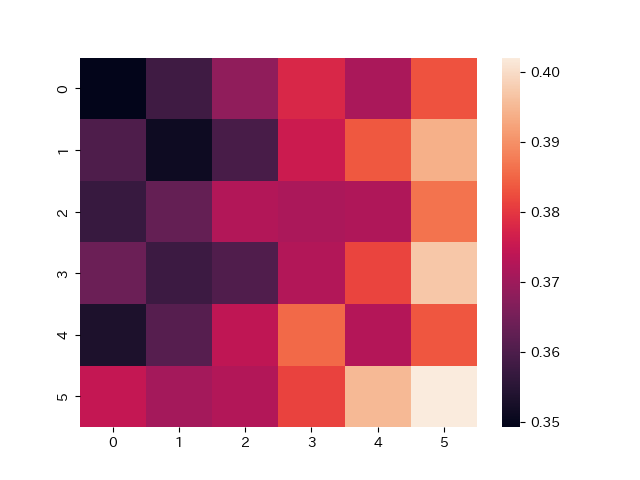

In [12]:
temp = np.array(green_p).reshape(-1, 6)
print(temp)
plt.figure()
sns.heatmap(temp)

In [13]:
def correction_RGB(blue):
    test = np.array(blue).reshape(-1, 6)
    diffs = []
    for i in range(6):
        diffs.append(test[i][5]-test[i][0])
    diff_mean = np.mean(diffs)
    diff_mean_per_b = diff_mean/5
    print('diff_mean_per_b',diff_mean_per_b)
    for i in range(6):
        for j in range(6):
            test[i][j] -= diff_mean_per_b*j

    diffs_r = []
    for i in range(6):
        diffs_r.append(test[5][i]-test[0][i])
    diff_mean_r = np.mean(diffs_r)
    diff_mean_per_r = diff_mean_r/5
    print('diff_mean_per_r',diff_mean_per_r)
    for i in range(6):
        for j in range(6):
            test[i][j] -= diff_mean_per_r*i
    print(test)


    plt.figure()
    sns.heatmap(test)

    test = test.ravel()
    print(np.mean(test),np.std(test))

diff_mean_per_b 0.009129828959703445
diff_mean_per_r 0.0045634925365448
[[0.29750568 0.28552112 0.28183103 0.28584713 0.28669012 0.30067906]
 [0.2933957  0.28141096 0.27182782 0.28219026 0.28061405 0.28931594]
 [0.2883787  0.27594084 0.2699842  0.27581352 0.27384108 0.28753835]
 [0.2810941  0.2731906  0.2699538  0.28135818 0.27281275 0.28297487]
 [0.2856009  0.28041312 0.276723   0.27983248 0.2744357  0.2854785 ]
 [0.29373583 0.28672904 0.28485218 0.29113483 0.28789803 0.2937242 ]]
0.28306296 0.0076283603


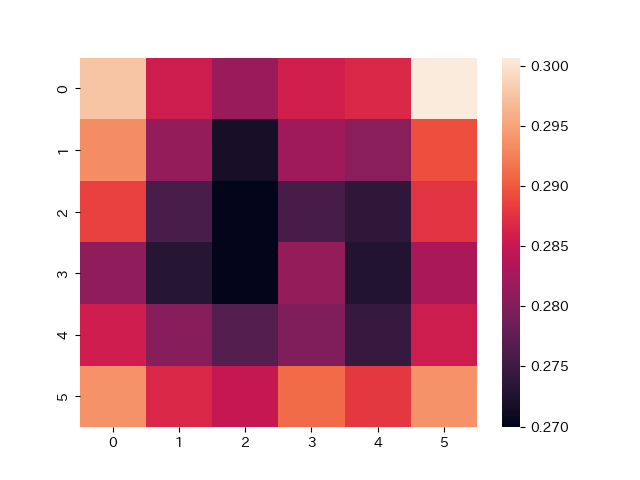

In [14]:
correction_RGB(green_i)

diff_mean_per_b 0.006255974620580673
diff_mean_per_r 0.002945086359977722
[[0.34920636 0.35172948 0.35574624 0.35904914 0.34640467 0.35166025]
 [0.3571456  0.34197858 0.34372663 0.3538946  0.35559264 0.35967425]
 [0.35102594 0.35083026 0.3539335  0.346939   0.3411584  0.34921372]
 [0.35488355 0.34255686 0.33895344 0.34490135 0.34754673 0.3568787 ]
 [0.34150764 0.3431252  0.34985736 0.35478094 0.3357101  0.34022892]
 [0.35987777 0.34970826 0.34509826 0.34785885 0.35526198 0.35599107]]
0.34954545 0.006323093


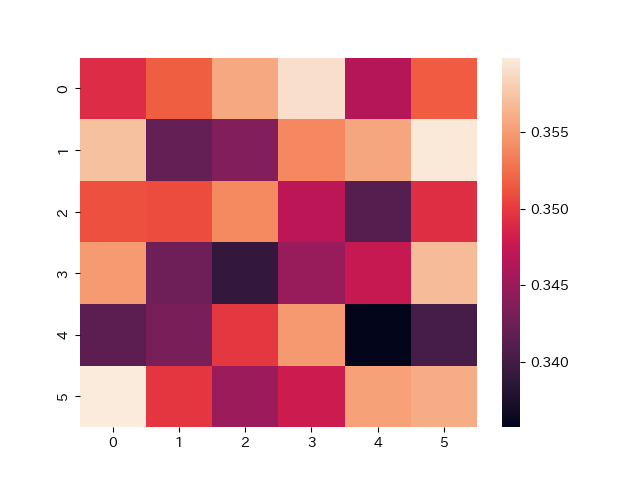

In [15]:
correction_RGB(green_p)

diff_mean_per_b 0.0032721709460020064
diff_mean_per_r 0.009539151191711425
[[0.21146789 0.20855726 0.20207556 0.19981651 0.20836936 0.21116209]
 [0.20559846 0.19993511 0.19849697 0.19669938 0.20937583 0.2039165 ]
 [0.20248133 0.19635653 0.19400139 0.1949584  0.20579726 0.20217553]
 [0.19569448 0.1959875  0.1904228  0.19138254 0.20221867 0.1990584 ]
 [0.20129295 0.19791098 0.19188778 0.19147643 0.1990986  0.19961098]
 [0.21010241 0.20808753 0.20481536 0.20533174 0.20239758 0.21071404]]
0.20135367 0.00600042


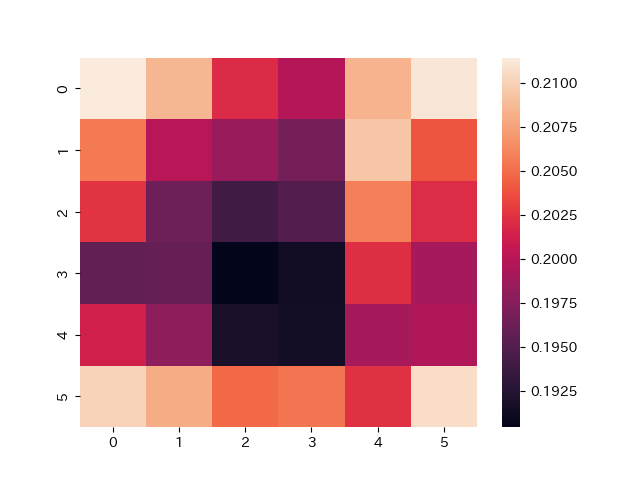

In [18]:
correction_RGB(green_h)